In [1]:
cd C:\Users\Aleni\OneDrive\Skrivbord\KKTV-Game-17.11-master\public

C:\Users\Aleni\OneDrive\Skrivbord\KKTV-Game-17.11-master\public


In [14]:
import os
import pandas as pd

# Set the directory where the CSV files are stored
dir_path = 'C:/Users/Aleni/OneDrive/Skrivbord/KKTV-Game-17.11-master/public'

# Create an empty list to hold the DataFrames
df_list = []

# Loop through CSV files with names starting with 'label-001' up to 'label-045' and append them to the list
for i in range(1, 46):
    filename = 'label-' + str(i).zfill(3) + '.csv'
    filepath = os.path.join(dir_path, filename)
    df = pd.read_csv(filepath)
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# Save the concatenated DataFrame to a CSV file named 'labels.csv'
df.to_csv('labels.csv', index=False)

In [6]:
df = pd.read_csv("df_part1_of_7.csv")

In [13]:
df

,user_id,1020,1021,1022,1023,1030,1031,1032,1033,1040,...,33193,33200,33201,33202,33203,52010,52011,52012,52013,52313
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,268,401,355,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12630,12630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12631,12631,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12632,12632,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12633,12633,0,0,0,0,0,0,0,0,0,...,0,0,46,0,0,0,0,0,0,0


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Load the data

In [3]:
import pandas as pd
import zipfile

# Unzip the files
with zipfile.ZipFile('train_target_events.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('train_source_events.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('test_source_events.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
#Train data
# The watching history of the training set users from 1640998800 to 1663376400
train_source_events = pd.read_csv("train_source_events.csv") 
# The watching history of the training set users from 1663376400 to 1663981200
train_target_events = pd.read_csv("train_target_events.csv")

#Test data
#The watching history of the testing set users from 1640998800 to 1663376400
test_source_events = pd.read_csv("test_source_events.csv")

In [3]:
train_source_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9714103 entries, 0 to 9714102
Data columns (total 10 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   user_id                   int64  
 1   device_id                 int64  
 2   session_id                int64  
 3   title_id                  int64  
 4   event_time                float64
 5   played_duration           int64  
 6   action_trigger            int64  
 7   platform                  int64  
 8   title_in_simulcast        int64  
 9   internet_connection_type  int64  
dtypes: float64(1), int64(9)
memory usage: 741.1 MB


In [4]:
train_source_events

,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type
0,0,205,33853,134,1.663414e+09,1442,0,0,0,1
1,0,205,33853,1214,1.663414e+09,2,0,0,1,1
2,0,205,33853,1214,1.663414e+09,132,0,0,1,1
3,0,205,33853,457,1.663418e+09,2928,0,0,0,1
4,0,205,33853,282,1.663419e+09,1394,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
374165,30459,139403,4225441,844,1.663765e+09,210,1,0,0,1
374166,30459,139403,4225441,844,1.663765e+09,210,1,0,0,1
374167,30459,139403,4225441,844,1.663765e+09,210,1,0,0,1
374168,30459,139403,4225441,844,1.663766e+09,210,1,0,0,1


In [13]:
import pandas as pd
import numpy as np
import datetime as dt

def preprocess_data(df):
    # Convert the event_time column to a datetime format
    df['event_time'] = pd.to_datetime(df['event_time'], unit='s')

    # Extract the date and timeslot information from the event_time column
    df['date'] = df['event_time'].dt.date
    df['hour'] = df['event_time'].dt.hour
    df['timeslot'] = pd.cut(df['hour'], 
                         bins=[1, 9, 17, 21, 24], 
                         labels=[0, 1, 2, 3], 
                         include_lowest=True, 
                         right=False)
    
    # Modify the 'date' column for the rows where 'hour' is 0
    # so that 0 counts as last timeslot for the day before
    mask = (df['hour'] == 0)
    df.loc[mask, 'date'] = df.loc[mask, 'event_time'].dt.date - dt.timedelta(days=1)
    df.loc[mask, 'timeslot'] = 3
    
    # Extract week number and day number from date
    df['week'] = pd.to_datetime(df['date']).dt.week
    df['day'] = pd.to_datetime(df['date']).dt.day
    
    #Extract time as week day timeslot
    #ex. if week = 13, day = 4 timeslot = 1 then time = 130401
    df['time'] = df['week'].astype(str).str.zfill(2) + \
             df['day'].astype(str).str.zfill(2) + \
             df['timeslot'].astype(str)

In [14]:
preprocess_data(train_source_events)
train_source_events

C:\Users\Aleni\AppData\Local\Temp\ipykernel_18660\3828975368.py:25: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = pd.to_datetime(df['date']).dt.week


,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type,date,hour,timeslot,week,week_number,day,time
0,0,525,2328,384,2022-04-03 01:36:30.276999936,1361,1,0,0,1,2022-04-03,1,0,13,13,3,13030
1,0,525,2328,384,2022-04-03 01:36:35.136000000,2,0,0,0,1,2022-04-03,1,0,13,13,3,13030
2,0,525,2400,68,2022-04-03 02:06:01.136000000,2,0,0,0,1,2022-04-03,2,0,13,13,3,13030
3,0,525,2400,68,2022-04-03 02:06:36.019000064,20,9,0,0,1,2022-04-03,2,0,13,13,3,13030
4,0,532,2401,68,2022-04-03 02:07:04.120999936,8,10,2,1,4,2022-04-03,2,0,13,13,3,13030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714098,30459,139403,4218064,113,2022-09-13 15:09:38.852000000,2157,1,0,0,1,2022-09-13,15,1,37,37,13,37131
9714099,30459,139403,4220179,113,2022-09-14 11:45:44.318000128,2743,1,0,0,1,2022-09-14,11,1,37,37,14,37141
9714100,30459,139403,4220179,113,2022-09-14 12:31:13.583000064,2723,1,0,0,1,2022-09-14,12,1,37,37,14,37141
9714101,30459,139403,4222301,113,2022-09-15 11:33:39.368999936,2699,1,0,0,1,2022-09-15,11,1,37,37,15,37151


In [18]:
#user_id	hour	week	day	slot	time
#2541	     0	     24	     2	 3	     2423

new_df = train_source_events[["user_id", "hour", "week", "day","timeslot", "time"]]
new_df.set_index('user_id', inplace=True)

In [19]:
new_df

,hour,week,day,time
user_id,,,,
0,1,13,3,13030
0,1,13,3,13030
0,2,13,3,13030
0,2,13,3,13030
0,2,13,3,13030
...,...,...,...,...
30459,15,37,13,37131
30459,11,37,14,37141
30459,12,37,14,37141


In [21]:
def extract_sessions(frame): 
    df_extracted_sessions = []
    for col in ['time']:
        for val in set(frame[col]):
            print ('Extracting frequency counts for (%s == %s)' % (col, val))
            tmp_df = frame.groupby(frame.index).apply(
                lambda group, x=col, y=val: np.sum(group[x] == y))
            tmp_df.name = '%s=%s' % (col, val)
            df_extracted_sessions.append(tmp_df)
    return pd.concat(df_extracted_sessions, axis=1)

final_data = extract_sessions(new_df)

Extracting frequency counts for (time == 18061)
Extracting frequency counts for (time == 07163)
Extracting frequency counts for (time == 25200)
Extracting frequency counts for (time == 22310)
Extracting frequency counts for (time == 18021)
Extracting frequency counts for (time == 31072)
Extracting frequency counts for (time == 12263)
Extracting frequency counts for (time == 17253)
Extracting frequency counts for (time == 35292)
Extracting frequency counts for (time == 03232)
Extracting frequency counts for (time == 02161)
Extracting frequency counts for (time == 29182)
Extracting frequency counts for (time == 33191)
Extracting frequency counts for (time == 11180)
Extracting frequency counts for (time == 12252)
Extracting frequency counts for (time == 14040)
Extracting frequency counts for (time == 52020)
Extracting frequency counts for (time == 35040)
Extracting frequency counts for (time == 01042)
Extracting frequency counts for (time == 13312)
Extracting frequency counts for (time ==

Extracting frequency counts for (time == 24193)
Extracting frequency counts for (time == 18020)
Extracting frequency counts for (time == 17252)
Extracting frequency counts for (time == 32120)
Extracting frequency counts for (time == 34282)
Extracting frequency counts for (time == 25213)
Extracting frequency counts for (time == 27090)
Extracting frequency counts for (time == 23061)
Extracting frequency counts for (time == 10123)
Extracting frequency counts for (time == 06111)
Extracting frequency counts for (time == 23090)
Extracting frequency counts for (time == 08220)
Extracting frequency counts for (time == 29242)
Extracting frequency counts for (time == 28141)
Extracting frequency counts for (time == 25211)
Extracting frequency counts for (time == 30271)
Extracting frequency counts for (time == 28162)
Extracting frequency counts for (time == 09013)
Extracting frequency counts for (time == 04262)
Extracting frequency counts for (time == 01071)
Extracting frequency counts for (time ==

KeyboardInterrupt: 

In [ ]:
final_data.head()
#final.columns.str[5:]
final_data.columns = final_data.columns.str[5:]

In [ ]:
final_data = final_data.rename(columns=int).sort_index(axis=1)
final_data.index = final_data.index.map(int)
final_data.sort_index(axis=0, inplace=True)

In [ ]:
# do the same for the labels 
preprocess_data(train_target_events)
target_df = train_target_events[["user_id", "hour", "week", "day", "time"]]
target_df.set_index('user_id', inplace=True)

final_labels = extract_sessions(target_df)

## old

In [43]:
import pandas as pd
import numpy as np
import datetime as dt

def preprocess_data(df):
    # Convert the event_time column to a datetime format
    df['event_time'] = pd.to_datetime(df['event_time'], unit='s')
    
    ## Start time = event_time - played_duration
    df['played_duration_td'] = pd.to_timedelta(df['played_duration'], unit='s')
    df['start_time'] = df['event_time'] - df['played_duration_td']

    # Extract the date and timeslot information from the event_time column
    df['end_date'] = df['event_time'].dt.date
    df['end_hour'] = df['event_time'].dt.hour
    df['end_timeslot'] = pd.cut(df['end_hour'], 
                         bins=[1, 9, 17, 21, 24], 
                         labels=[0, 1, 2, 3], 
                         include_lowest=True, 
                         right=False)
    
    # Modify the 'date' column for the rows where 'hour' is 0
    # so that 0 counts as last timeslot for the day before
    mask = (df['end_hour'] == 0)
    df.loc[mask, 'end_date'] = df.loc[mask, 'event_time'].dt.date - dt.timedelta(days=1)
    df.loc[mask, 'end_timeslot'] = 3
    
    
    # Extract the date and timeslot information from the event_time column
    df['start_date'] = df['start_time'].dt.date
    df['start_hour'] = df['start_time'].dt.hour
    df['start_timeslot'] = pd.cut(df['start_hour'], 
                         bins=[1, 9, 17, 21, 24], 
                         labels=[0, 1, 2, 3], 
                         include_lowest=True, 
                         right=False)
    
    # Modify the 'date' column for the rows where 'hour' is 0
    # so that 0 counts as last timeslot for the day before
    mask = (df['start_hour'] == 0)
    df.loc[mask, 'start_date'] = df.loc[mask, 'start_time'].dt.date - dt.timedelta(days=1)
    df.loc[mask, 'start_timeslot'] = 3
    

In [44]:
preprocess_data(train_source_events)

In [45]:
train_source_events

,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type,...,hour,timeslot,end_date,end_hour,end_timeslot,played_duration_td,start_time,start_date,start_hour,start_timeslot
0,0,525,2328,384,2022-04-03 01:36:30.276999936,1361,1,0,0,1,...,1,0,2022-04-03,1,0,0 days 00:22:41,2022-04-03 01:13:49.276999936,2022-04-03,1,0
1,0,525,2328,384,2022-04-03 01:36:35.136000000,2,0,0,0,1,...,1,0,2022-04-03,1,0,0 days 00:00:02,2022-04-03 01:36:33.136000000,2022-04-03,1,0
2,0,525,2400,68,2022-04-03 02:06:01.136000000,2,0,0,0,1,...,2,0,2022-04-03,2,0,0 days 00:00:02,2022-04-03 02:05:59.136000000,2022-04-03,2,0
3,0,525,2400,68,2022-04-03 02:06:36.019000064,20,9,0,0,1,...,2,0,2022-04-03,2,0,0 days 00:00:20,2022-04-03 02:06:16.019000064,2022-04-03,2,0
4,0,532,2401,68,2022-04-03 02:07:04.120999936,8,10,2,1,4,...,2,0,2022-04-03,2,0,0 days 00:00:08,2022-04-03 02:06:56.120999936,2022-04-03,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714098,30459,139403,4218064,113,2022-09-13 15:09:38.852000000,2157,1,0,0,1,...,15,1,2022-09-13,15,1,0 days 00:35:57,2022-09-13 14:33:41.852000000,2022-09-13,14,1
9714099,30459,139403,4220179,113,2022-09-14 11:45:44.318000128,2743,1,0,0,1,...,11,1,2022-09-14,11,1,0 days 00:45:43,2022-09-14 11:00:01.318000128,2022-09-14,11,1
9714100,30459,139403,4220179,113,2022-09-14 12:31:13.583000064,2723,1,0,0,1,...,12,1,2022-09-14,12,1,0 days 00:45:23,2022-09-14 11:45:50.583000064,2022-09-14,11,1
9714101,30459,139403,4222301,113,2022-09-15 11:33:39.368999936,2699,1,0,0,1,...,11,1,2022-09-15,11,1,0 days 00:44:59,2022-09-15 10:48:40.368999936,2022-09-15,10,1


In [ ]:
   
def activetime_per_timeslot(df):
    # CREATE new column IS_origninal_Event set = 1 for all events
    
    # Calculate active time for events that end in the same timeslot they started
    mask = (df['start_date'] == df['end_date']) & (df['start_timeslot'] == df['end_timeslot'])
    df.loc[mask, 'active_time_in_timeslot'] = df.loc[mask, 'played_duration']
    
    # Calculate active time for events that end in a different timeslot than they started
    mask = (df['start_date'] == df['end_date']) & (df['start_timeslot'] != df['end_timeslot'])
    
    # time in timeslot = timeslot_end_time - start_time
    def timeslot_end_time(hour)
        if hour in range(0, 1) return 1
        if hour in range(1, 9) return 9
        if hour in range(9, 17) return 17
        if hour in range(17, 21) return 21
        if hour in range(21, 24) return 24
    
    def start_time_from_hour_and_date(start_date, start_hour)
        start_hour = timeslot_end_time(start_hour)
        # return the combination of start date and start hour as a pd.to_timedelta
        # start_date is an in variabel dt.date format, start_hour is just an integer value ex. 9
        start_time_str = str(start_date) + ' ' + str(start_hour) + ':00:00'
        start_time = pd.to_datetime(start_time_str)
        start_time_timedelta = pd.to_timedelta(start_time.strftime('%H:%M:%S'))
        return start_time_timedelta
    
    active_time_in_timeslot = start_time_from_hour_and_date(start_date, start_hour) - start_time
       

    # CREATE NEW EVENT in new df
    #                  where duration = duration - active_time_in_timeslot  
    #                  IS_origninal_Event = 0 
    #                  start_time = start_time_from_hour_and_date(start_date, start_hour)
    #                  OTHER Variables remain the same  
    

    # else if start_date != end_date
    # if the event is for multiple > 3 days just do caclualations for first and last day 
    # as all other days will have active time = all time
    
    # break it up to multiple events one for each day
    #
    
    
    # drop event_time and start_time

In [54]:

def activetime_per_timeslot(df):
    # Calculate active time for events that end in the same timeslot they started
    mask = (df['start_date'] == df['end_date']) & (df['start_timeslot'] == df['end_timeslot'])
    df.loc[mask, 'active_time_in_timeslot'] = df.loc[mask, 'played_duration']

    # Calculate active time for events that end in a different timeslot than they started
    mask = (df['start_date'] == df['end_date']) & (df['start_timeslot'] != df['end_timeslot'])
    
    # time in timeslot = timeslot_end_time - start_time
    def timeslot_end_time(hour):
        if hour in range(0, 1):
            return 1
        if hour in range(1, 9):
            return 9
        if hour in range(9, 17):
            return 17
        if hour in range(17, 21):
            return 21
        if hour in range(21, 24):
            return 24

    def end_time_from_hour_and_date(date, start_hour):
        end_hour = timeslot_end_time(start_hour)
        # return the combination of start date and start hour as a pd.to_timedelta
        # start_date is an in variable dt.date format, start_hour is just an integer value ex. 9
        end_time_str = str(date) + ' ' + str(end_hour) + ':00:00'
        end_time = pd.to_datetime(end_time_str)
        end_time_timedelta = pd.to_timedelta(end_time.strftime('%H:%M:%S'))
        return end_time_timedelta

df.loc[mask, 'start_time'] = df.loc[mask].apply(lambda row: end_time_from_hour_and_date(row['start_date'], row['start_hour']), axis=1)
df.loc[mask, 'active_time_in_timeslot'] = pd.to_timedelta(df.loc[mask, 'end_time'] - df.loc[mask, 'start_time'])


In [55]:
activetime_per_timeslot(train_source_events)

TypeError: dtype timedelta64[ns] cannot be converted to datetime64[ns]

In [17]:
import pandas as pd

def group_data(df):
    # first create a new column with the desired label
    df['label'] = df['date'].astype(str) + '_timeslot_' + df['timeslot'].astype(str)

    # create the pivot table with user_id as index, label as columns, and played_duration as values
    pivot_df = pd.pivot_table(df, index='user_id', columns='label', 
                              values={'played_duration': 'sum', #
                                      'action_trigger': 'mean',
                                      
                                      'device_id': 'mean',
                                      'session_id': 'mean',
                                      'title_id': 'mean',
                                      'platform': 'mean',
                                      'title_in_simulcast': 'mean',
                                      'internet_connection_type': 'mean',
                                     }, fill_value=0)
    

   


    # rename the columns to remove the 'label' prefix
    #pivot_df.columns = pivot_df.columns.str.replace('label_', '')

    # reset the index to get the user_id back as a column
    pivot_df = pivot_df.reset_index()

    # print the resulting dataframe
    return new_df
    
        #if event_time + played_duration -> next timeslot
    # solve recuresevly? 
    # 
    # column for active_time_in_timeslot 
    # column for nr_events in timeslot 


In [18]:
new_df = group_data(train_source_events)

In [19]:
new_df

device_id                                                            \
date     2022-01-01               2022-01-02               2022-01-03           
timeslot          0     1    2  3          0       1  2  3          0       1   
user_id                                                                         
0                 0     0    0  0          0       0  0  0          0       0   
1                 0     0    0  0          0       0  0  0          0       0   
2                 0     0    0  0          0       0  0  0          0       0   
3               508  1979  762  0       3048    4318  0  0          0     762   
4                 0     0    0  0          0       0  0  0          0       0   
...             ...   ...  ... ..        ...     ... .. ..        ...     ...   
30455             0     0    0  0          0       0  0  0          0       0   
30456             0     0    0  0          0       0  0  0          0       0   
30457             0     0    0  0          0       0  0  0          0       0   
30458             0     0    0  0          0       0  0  0          0       0   
30459             0     0    0  0          0  279174  0  0          0  279174   

          ... played_duration                                                  \
date      ...      2022-09-14       2022-09-15               2022-09-16         
timeslot  ...               2     3          0     1  2    3          0     1   
user_id   ...                                                                   
0         ...               0     0          0  1440  0    0          0  1140   
1         ...               0     1          0   162  0    0       2915  4395   
2         ...            5976     0          0  2797  0    0          0  1186   
3         ...               0     0          0  9155  0    0          0  5429   
4         ...               0  1632       2424     0  0  871          0     0   
...       ...             ...   ...        ...   ... ..  ...        ...   ...   
30455     ...               0     0          0     0  0    0          0     0   
30456     ...               0     0          0     0  0    0          0     0   
30457     ...               0     0          0  4181  0    0          0   304   
30458     ...               0     0          0     0  0    0          0     0   
30459     ...               0     0          0  2702  0    0          0     0   

                      
date                  
timeslot     2     3  
user_id               
0            0     0  
1            0  1001  
2         3409     0  
3            0     0  
4            0     0  
...        ...   ...  
30455        0     0  
30456        0     0  
30457        0     0  
30458        0     0  
30459        0     0  

[30460 rows x 2072 columns]

In [ ]:
# create the pivot table with user_id as index, label as columns, and played_duration as values
pivot_df = pd.pivot_table(df, index='user_id', columns=['date', 'timeslot'], 
                          values={'played_duration': 'sum', 
                                  'action_trigger': 'mean',
                                  'device_id': 'mean',
                                  'session_id': 'mean',
                                  'title_id': 'mean',
                                  'platform': 'mean',
                                  'title_in_simulcast': 'mean',
                                  'internet_connection_type': 'mean',
                                 }, fill_value=0, aggfunc=list)


## device_id  -> device_count

In [23]:
# Group the DataFrame by user_id and count the number of unique device_id values
device_count = train_source_events.groupby('user_id')['device_id'].nunique()

# Count the number of times the count is greater than 1
num_users_with_multiple_devices = (device_count > 1).sum()

print(f"{num_users_with_multiple_devices} users have more than one device_id.")



25926 users have more than one device_id.


In [22]:
device_count

user_id
0         8
1         5
2         6
3        12
4         4
         ..
30455     2
30456     9
30457     6
30458     2
30459     3
Name: device_id, Length: 30460, dtype: int64

In [20]:
train_source_events_hour_1 = train_source_events[train_source_events['hour'] == 10
                            ]
print(train_source_events_hour_1)

         user_id  device_id  session_id  title_id  \
62             0        801       11088       285   
69             0        525       12596       384   
70             0        525       12596       384   
127            0        205        4123       285   
135            0        205        5091       285   
...          ...        ...         ...       ...   
9713999    30459     139403     4198695         8   
9714000    30459     139403     4198695         0   
9714029    30459     139403     4204670         0   
9714067    30459     139403     4219936        17   
9714082    30459     139403     4212189       148   

                           event_time  played_duration  action_trigger  \
62      2022-04-12 10:43:43.474999808             1881               0   
69      2022-04-14 10:00:24.757999872               36               0   
70      2022-04-14 10:02:33.493999872               35               0   
127     2022-05-07 10:20:51.015000064             2766             

    Preprocess the data:
        Convert the event_time column to a datetime format.
        Extract the day of the week and hour of the day from the event_time column.
        Group the data by user_id, day of the week, and hour of the day to get the total duration of activity for each user in each timeslot.

    Create features:
        Calculate the percentage of activity for each user in each timeslot relative to their total activity.
        Calculate the percentage change in activity for each user in each timeslot compared to the previous week.

    Train a machine learning model:
        Split the data into training and testing sets.
        Train a model, such as a random forest or gradient boosting, to predict the probability of a user being active in each timeslot based on the features created in step 2.

    Evaluate the model:
        Calculate metrics such as accuracy, precision, recall, and F1-score on the testing set.
        Analyze the confusion matrix to see which timeslots are being predicted correctly or incorrectly.

In [9]:
import pandas as pd
from datetime import datetime, timedelta

# Step 1: Preprocess the data
def preprocess_data(events):
    # Convert event_time to datetime format
    events['event_time'] = pd.to_datetime(events['event_time'], unit='s')
    # Extract day of the week and hour of the day from event_time
    events['day_of_week'] = events['event_time'].dt.dayofweek
    events['hour_of_day'] = events['event_time'].dt.hour
    # Group by user_id, day of the week, and hour of the day
    events_grouped = events.groupby(['user_id', 'day_of_week', 'hour_of_day']).agg({'played_duration': 'sum'})
    return events_grouped

train_source_events_grouped = preprocess_data(train_source_events)
train_target_events_grouped = preprocess_data(train_target_events)
test_source_events_grouped = preprocess_data(test_source_events)

In [10]:
train_source_events_grouped

played_duration
user_id day_of_week hour_of_day                 
0       0           0                        836
                    1                       6669
                    2                       4752
                    3                       1435
                    4                       4902
...                                          ...
30459   6           10                      3528
                    11                     19531
                    12                     17366
                    13                     19393
                    14                      7466

[1951648 rows x 1 columns]

In [ ]:
# Step 2: Create features
def create_features(events_grouped):
    # Calculate percentage of activity for each user in each timeslot relative to their total activity
    events_grouped['total_duration'] = events_grouped.groupby(['user_id'])['played_duration'].transform('sum')
    events_grouped['activity_percent'] = events_grouped['played_duration'] / events_grouped['total_duration']
    # Calculate percentage change in activity for each user in each timeslot compared to previous week
    events_grouped['activity_percent_change'] = events_grouped.groupby(['user_id', 'hour_of_day'])['activity_percent'].transform(lambda x: x.pct_change(periods=7))
    events_grouped.fillna(0, inplace=True)
    return events_grouped

train_source_events_features = create_features(train_source_events_grouped)
train_target_events_features = create_features(train_target_events_grouped)
test_source_events_features = create_features(test_source_events_grouped)

In [5]:
train_source_events_features

played_duration  total_duration  \
user_id day_of_week hour_of_day                                    
0       0           0                        836         1009115   
                    1                       6669         1009115   
                    2                       4752         1009115   
                    3                       1435         1009115   
                    4                       4902         1009115   
...                                          ...             ...   
30459   6           10                      3528          482750   
                    11                     19531          482750   
                    12                     17366          482750   
                    13                     19393          482750   
                    14                      7466          482750   

                                 activity_percent  activity_percent_change  
user_id day_of_week hour_of_day                                             
0       0           0                    0.000828                      0.0  
                    1                    0.006609                      0.0  
                    2                    0.004709                      0.0  
                    3                    0.001422                      0.0  
                    4                    0.004858                      0.0  
...                                           ...                      ...  
30459   6           10                   0.007308                      0.0  
                    11                   0.040458                      0.0  
                    12                   0.035973                      0.0  
                    13                   0.040172                      0.0  
                    14                   0.015466                      0.0  

[1951648 rows x 4 columns]

In [7]:
train_target_events_features


played_duration  total_duration  \
user_id day_of_week hour_of_day                                    
0       0           13                      1404           14636   
                    23                        98           14636   
        1           12                      1644           14636   
                    13                      1009           14636   
                    14                      1106           14636   
...                                          ...             ...   
30458   5           12                       103            5046   
                    23                       656            5046   
30459   2           12                      1112            5134   
                    13                       630            5134   
        3           14                      3392            5134   

                                 activity_percent  activity_percent_change  
user_id day_of_week hour_of_day                                             
0       0           13                   0.095928                      0.0  
                    23                   0.006696                      0.0  
        1           12                   0.112326                      0.0  
                    13                   0.068940                      0.0  
                    14                   0.075567                      0.0  
...                                           ...                      ...  
30458   5           12                   0.020412                      0.0  
                    23                   0.130004                      0.0  
30459   2           12                   0.216595                      0.0  
                    13                   0.122711                      0.0  
        3           14                   0.660693                      0.0  

[198684 rows x 4 columns]

# Step 3: Train a machine learning model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define X and y for training
X_train = train_source_events_features[['activity_percent', 'activity_percent_change']]
y_train = train_target_events_features['played_duration']

# Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Define X and y for testing
X_test = test_source_events_features[['activity_percent', 'activity_percent_change']]
y_test = rf_model.predict(X_test)

# Step 4: Evaluate the model
y_true = test_source_events_features['played_duration']
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
confusion_mat = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion matrix:\n{confusion_mat}")


ValueError: Found input variables with inconsistent numbers of samples: [1951648, 198684]

# old

In [2]:
def split_event_by_timeslots(event):
    start_time = event['start_time']
    end_time = event['end_time']
    user_id = event['user_id']
    played_duration = event['played_duration']

    slots = {
        1: ('01:00:00', '09:00:00'),
        2: ('09:00:00', '17:00:00'),
        3: ('17:00:00', '21:00:00'),
        4: ('21:00:00', '01:00:00'),
    }

    def get_timeslot_boundaries(timeslot, date):
        start, end = slots[timeslot]
        if timeslot == 4:
            end_date = date + pd.DateOffset(days=1)
            return pd.to_datetime(f'{date} {start}'), pd.to_datetime(f'{end_date} {end}')
        else:
            return pd.to_datetime(f'{date} {start}'), pd.to_datetime(f'{date} {end}')

    split_events = []
    for timeslot, (slot_start, slot_end) in slots.items():
        date = start_time.date()
        slot_start_time, slot_end_time = get_timeslot_boundaries(timeslot, date)

        while slot_start_time < end_time:
            overlap_start = max(start_time, slot_start_time)
            overlap_end = min(end_time, slot_end_time)

            if overlap_start < overlap_end:
                duration = (overlap_end - overlap_start).seconds
                split_events.append({
                    'user_id': user_id,
                    'date': date,
                    'timeslot': timeslot,
                    'active_time': duration,
                })

            date += pd.DateOffset(days=1)
            slot_start_time, slot_end_time = get_timeslot_boundaries(timeslot, date)

    return split_events

def preprocess_data(events):
    events['end_time'] = pd.to_datetime(events['event_time'], unit='s')
    events['start_time'] = events['end_time'] - events['played_duration'] * pd.to_timedelta(1, unit='s')

    split_events = []
    for _, event in events.iterrows():
        split_events.extend(split_event_by_timeslots(event))

    split_events_df = pd.DataFrame(split_events)
    events_grouped = split_events_df.groupby(['user_id', 'date', 'timeslot']).agg(
        active_time=pd.NamedAgg(column='active_time', aggfunc='sum'),
        nr_events=pd.NamedAgg(column='active_time', aggfunc='count')
    ).reset_index()

    events_pivot = events_grouped.pivot_table(
        index='user_id',
        columns=['date', 'timeslot'],
        values=['active_time', 'nr_events'],
        fill_value=0
    )
    events_pivot.columns = [f"{col[0]}_{col[1]}_timeslot_{col[2]}" for col in events_pivot.columns]

    return events_pivot.reset_index()


In [5]:
train_data = preprocess_data(train_source_events.head(100))

C:\Users\Aleni\AppData\Local\Temp\ipykernel_17960\1862460488.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['end_time'] = pd.to_datetime(events['event_time'], unit='s')
C:\Users\Aleni\AppData\Local\Temp\ipykernel_17960\1862460488.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['start_time'] = events['end_time'] - events['played_duration'] * pd.to_timedelta(1, unit='s')


In [6]:
train_data

,user_id,active_time_2022-04-03_timeslot_1,active_time_2022-04-03_timeslot_2,active_time_2022-04-03_timeslot_4,active_time_2022-04-04_timeslot_1,active_time_2022-04-05_timeslot_1,active_time_2022-04-05_timeslot_2,active_time_2022-04-06_timeslot_1,active_time_2022-04-07_timeslot_2,active_time_2022-04-07_timeslot_4,...,nr_events_2022-04-10_timeslot_2,nr_events_2022-04-12_timeslot_2,nr_events_2022-04-13_timeslot_2,nr_events_2022-04-14_timeslot_2,nr_events_2022-04-15_timeslot_2,nr_events_2022-04-16_timeslot_1,nr_events_2022-04-22_timeslot_2,nr_events_2022-04-23_timeslot_1,nr_events_2022-04-28_timeslot_4,nr_events_2022-04-30_timeslot_1
0,0,4147,4062,877,5734,7639,165,1304,263,656,...,1,1,5,3,6,7,1,4,1,8


In [49]:

def preprocess_data(events):
    

    #change the event time to date time format & rename it
    events['end_time'] = pd.to_datetime(events['event_time'], unit='s')
    
    # enable this later
    #events.drop('event_time', axis=1, inplace=True)

    
    events['start_time'] = pd.to_datetime(events['end_time'], unit='s') - events['played_duration']*pd.to_timedelta(1, unit='s')

    # for each user_id and date
    # determine the active time in each timeslots: 
    # 01 - 09  -> timeslot 1
    # 09 - 17  -> timeslot 2
    # 17 - 21  -> timeslot 3
    # 21 - 01 (the next day) -> timeslot 4
    #  events[timeslot_1_active_time] = sum of the active time within the timeslot 
    #  events[timeslot_x_events] = count of the number of events with a start_time in the timeslot
    
    # 1. use the start time to get the date and timeslot 
    # ex. 2022-04-03_timeslot_1 would be from 2022-04-03 01:00 to 2022-04-03 09:00
    # 
    
    # calculate the fetures for the all the unique user_ids for that timeslot:
    #
    # User X:                   2022-04-03_timeslot_1                                         2022-04-03_timeslot_2
    #active_time           sum of the active time within the timeslot
    #nr_events      count of the nr of events with start start_time in the timeslot
    #title_id


    #events['day_of_week'] = events['event_time'].dt.dayofweek
    #source_events['end_time_hour'] = source_events['end_time'].dt.hour
    #source_events['start_time_hour'] = source_events['end_time'].dt.hour
    #for all the users start with the 
    #for all the timeslots between start_time and end_time -> 1 others -> 0
    
    # Calculate the timeslot based on the hour
    #source_events['timeslot_0'] = source_events['hour'].apply(lambda x: 1 if x < 8 else 0)
    #source_events['timeslot_1'] = source_events['hour'].apply(lambda x: 1 if x < 16 else 0)
    #source_events['timeslot_2'] = source_events['hour'].apply(lambda x: 1 if x < 8 else 0)
    #source_events['timeslot_3'] = source_events['hour'].apply(lambda x: 1 if x < 8 else 0)
    grouped_data = events.groupby('user_id')
    return events
    

In [50]:
train_data = preprocess_data(train_source_events)

In [98]:
train_data['start_time']

0         2022-04-03 01:13:49.276999936
1         2022-04-03 01:36:33.136000000
2         2022-04-03 02:05:59.136000000
3         2022-04-03 02:06:16.019000064
4         2022-04-03 02:06:56.120999936
                       ...             
9714098   2022-09-13 14:33:41.852000000
9714099   2022-09-14 11:00:01.318000128
9714100   2022-09-14 11:45:50.583000064
9714101   2022-09-15 10:48:40.368999936
9714102   2022-09-15 11:38:18.027000064
Name: start_time, Length: 9714103, dtype: datetime64[ns]

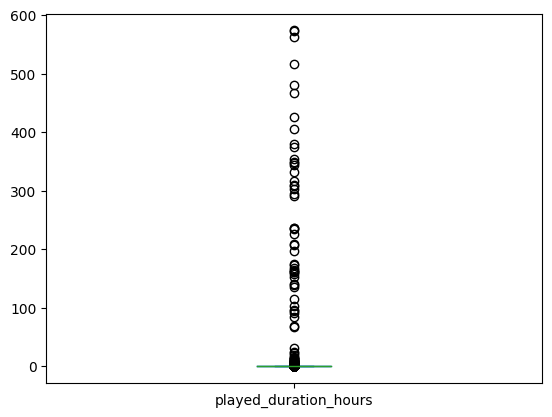

In [53]:
import matplotlib.pyplot as plt
train_data['played_duration_hours'] = train_data['played_duration'].div(3600)
train_data['played_duration_hours'].plot(kind='box')
plt.show()


In [54]:
user_data = train_data[train_data['user_id'] == 1]
user_data

,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type,end_time,start_time,played_duration_hours
1286,1,1,4004,539,1.641318e+09,618,2,1,0,1,2022-01-04 17:32:07.986000128,2022-01-04 17:21:49.986000128,0.171667
1287,1,1,4004,539,1.641318e+09,48,0,1,0,1,2022-01-04 17:33:01.426000128,2022-01-04 17:32:13.426000128,0.013333
1288,1,1,5479,539,1.641358e+09,1295,1,1,0,3,2022-01-05 04:53:40.636000000,2022-01-05 04:32:05.636000000,0.359722
1289,1,1,5479,539,1.641359e+09,44,0,1,0,3,2022-01-05 05:01:12.075000064,2022-01-05 05:00:28.075000064,0.012222
1290,1,1,7241,239,1.641581e+09,297,0,1,0,1,2022-01-07 18:41:20.891000064,2022-01-07 18:36:23.891000064,0.082500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,1,575,33564,16,1.663342e+09,56,2,2,0,4,2022-09-16 15:20:59.560000000,2022-09-16 15:20:03.560000000,0.015556
1649,1,575,33578,16,1.663344e+09,1291,2,2,0,4,2022-09-16 16:04:59.614000128,2022-09-16 15:43:28.614000128,0.358611
1650,1,575,33578,16,1.663345e+09,16,0,2,0,4,2022-09-16 16:16:08.676000000,2022-09-16 16:15:52.676000000,0.004444
1651,1,1,33603,199,1.663369e+09,803,2,1,0,1,2022-09-16 22:50:19.836999936,2022-09-16 22:36:56.836999936,0.223056


# plot user activity

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def split_event_by_hours(event):
    start_time = event['start_time']
    end_time = event['end_time']
    duration = (end_time - start_time).total_seconds() / 3600

    rows = []
    current_time = start_time.replace(minute=0, second=0) + pd.Timedelta(hours=1)
    
    while current_time < end_time:
        row = event.copy()
        row_duration = (current_time - start_time).total_seconds() / 3600
        row['duration'] = row_duration
        row['end_time'] = current_time
        rows.append(row)

        start_time = current_time
        current_time += pd.Timedelta(hours=1)
        duration -= row_duration

    event['start_time'] = start_time
    event['duration'] = duration
    rows.append(event)
    
    return rows


def plot_user_activity(train_data, user_ids, week_numbers):
    combined_data_list = []

    for user_id in user_ids:
        for week_number in week_numbers:
            user_data = train_data[train_data['user_id'] == user_id].copy()

            user_data['start_time'] = pd.to_datetime(user_data['start_time'])
            user_data['end_time'] = pd.to_datetime(user_data['end_time'])

            min_start_time = user_data['start_time'].min()
            week_start = min_start_time + pd.Timedelta(weeks=week_number - 1)
            week_end = week_start + pd.Timedelta('7 days')
            user_data = user_data[(user_data['start_time'] >= week_start) & (user_data['start_time'] < week_end)]

            # Split events by hours
            split_events = []
            for idx, event in user_data.iterrows():
                split_events.extend(split_event_by_hours(event))

            user_data = pd.DataFrame(split_events)

            user_data['hour'] = user_data['start_time'].dt.hour
            user_data['day_of_week'] = user_data['start_time'].dt.dayofweek

            combined_data_list.append(user_data)

    combined_data = pd.concat(combined_data_list, ignore_index=True)

    activity_table = pd.pivot_table(combined_data, values='duration', index='hour', columns='day_of_week', aggfunc='sum')
    activity_table = activity_table.reindex(index=range(0, 24), columns=range(0, 7)).fillna(0)

    def custom_formatter(value):
        if value == 0 or np.isnan(value):
            return ''
        else:
            return f'{value:.1f}'

    sns.heatmap(activity_table, cmap='YlOrRd', annot=np.vectorize(custom_formatter)(activity_table), fmt='', cbar=False)

    plt.xlabel('Day of Week')
    plt.ylabel('Hour of Day')

    plt.show()


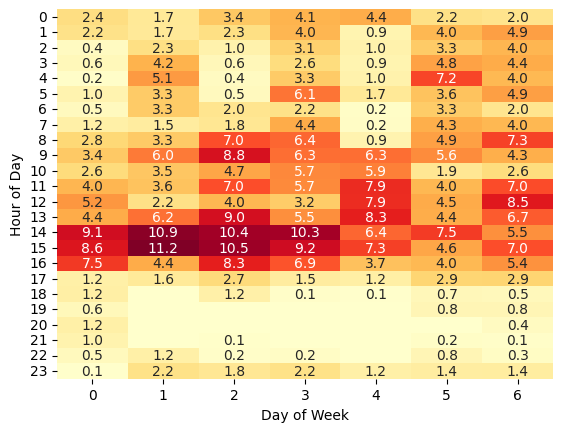

In [107]:
plot_user_activity(train_data, [1,2,3], [1, 2,3,4,5,6,7,8,9,10,11])


# Old code

In [3]:
import pandas as pd

def preprocess_data(source_events, labels=None):
    # Convert event_time to datetime
    source_events['event_time'] = pd.to_datetime(source_events['event_time'], unit='s')
    
    # Extract day of the week, hour, and minute from event_time
    source_events['day_of_week'] = source_events['event_time'].dt.dayofweek
    source_events['hour'] = source_events['event_time'].dt.hour
    source_events['minute'] = source_events['event_time'].dt.minute
    source_events['day'] = source_events['event_time'].dt.day
    source_events['month'] = source_events['event_time'].dt.month

    # Calculate the timeslot based on the hour
    source_events['timeslot'] = source_events['hour'].apply(lambda x: 0 if x < 8 else (1 if x < 16 else (2 if x < 20 else 3)))

    # Group the data by user_id, day_of_week, and timeslot
    grouped_data = source_events.groupby(['user_id', 'month','day','day_of_week','timeslot', 'played_duration', 'title_in_simulcast']).agg({
        'platform': lambda x: x.mode()[0],
        'internet_connection_type': lambda x: x.mode()[0],
        'title_id': lambda x: x.mode()[0],
        'action_trigger': lambda x: x.mode()[0],
    }).reset_index()

    # Flatten the multi-level column names
    grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values]

    return grouped_data

In [3]:
import pandas as pd


#Preprocess the event data 
def preprocess_data(source_events):
    
    # Convert event_time to datetime
    source_events['event_time'] = pd.to_datetime(source_events['event_time'], unit='s')
    
    # Extract day of the week, day of the month, month, year, hour, and minute from event_time
    source_events['day_of_week'] = source_events['event_time'].dt.dayofweek
    source_events['day'] = source_events['event_time'].dt.day
    source_events['month'] = source_events['event_time'].dt.month
    source_events['year'] = source_events['event_time'].dt.year
    source_events['hour'] = source_events['event_time'].dt.hour
    source_events['minute'] = source_events['event_time'].dt.minute

    # Calculate the timeslot based on the hour
    source_events['timeslot'] = source_events['hour'].apply(lambda x: 0 if x < 8 else (1 if x < 16 else (2 if x < 20 else 3)))

    # Group the data by user_id, day_of_week, day, month, year, and timeslot
    grouped_data = source_events.groupby(['user_id', 'day_of_week', 'day', 'month', 'timeslot']).agg({
        'played_duration': ['sum', 'mean', 'count'],
        'title_in_simulcast': 'sum',
        'platform': lambda x: x.mode()[0],
        'internet_connection_type': lambda x: x.mode()[0],
        'title_id': lambda x: x.mode()[0],
        'action_trigger': lambda x: x.mode()[0],
    }).reset_index()

    # Flatten the multi-level column names
    grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values]
    
    # Merge the preprocessed source events with the labels only if labels are provided
    #if labels is not None:
    #    data = pd.merge(grouped_data, labels, on='user_id', how='left')
    #else:
    #    data = grouped_data

    return data


In [ ]:
train_data = preprocess_data(train_source_events)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

# Read input data
source_events = pd.read_csv('source_events.csv')
labels = pd.read_csv('labels.csv')

# Preprocess the data
data = preprocess_data(source_events, labels)

# Separate the features and target variables
X = data.drop(['user_id', 'time_slot_0', 'time_slot_1', 'time_slot_2', 'time_slot_3'], axis=1)
y = data[['time_slot_0', 'time_slot_1', 'time_slot_2', 'time_slot_3']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model for each time slot
models = []
for i in range(4):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train.iloc[:, i])
    models.append(model)

# Evaluate the models on the test data
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    y_true = y_test.iloc[:, i]
    
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model {i}:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print()


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

def train_model(data, target_cols):
    # Split data into training and validation sets
    #X_train, X_val, y_train, y_val = train_test_split(data.drop(target_cols, axis=1), data[target_cols], test_size=0.2, random_state=42)

    # Convert the data into DMatrix format for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    # Set XGBoost parameters
    params = {
        'objective': 'multi:softprob',
        'num_class': 28,
        'eval_metric': 'mlogloss',
        'seed': 42,
        'nthread': -1,
    }

    # Train the XGBoost model
    bst = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=50, evals=[(dval, 'val')], verbose_eval=100)

    # Predict the probabilities for the validation set
    y_val_pred = bst.predict(dval)

    # Calculate the log loss for the validation set
    logloss = log_loss(y_val, y_val_pred)
    print(f'Validation Log Loss: {logloss}')

    return bst


In [13]:
def train_model(data, target):
    # Convert the data into DMatrix format for XGBoost
    dtrain = xgb.DMatrix(data, label=target)

    # Set the parameters for the XGBoost model
    param = {
        'max_depth': 6,
        'eta': 0.3,
        'objective': 'multi:softmax',
        'num_class': 3,
    }
    num_round = 20

    # Train the model
    bst = xgb.train(param, dtrain, num_round)
    return bst


In [6]:
train_target_df = pd.read_csv('light_train_target_labels.csv') # train labels
train_target_df

,user_id,time_slot_0,time_slot_1,time_slot_2,time_slot_3,time_slot_4,time_slot_5,time_slot_6,time_slot_7,time_slot_8,...,time_slot_18,time_slot_19,time_slot_20,time_slot_21,time_slot_22,time_slot_23,time_slot_24,time_slot_25,time_slot_26,time_slot_27
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30455,30455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30456,30456,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30457,30457,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30458,30458,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
train_source_events

,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type,day_of_week,hour,minute,timeslot
0,0,525,2328,384,2022-04-03 01:36:30.276999936,1361,1,0,0,1,6,1,36,0
1,0,525,2328,384,2022-04-03 01:36:35.136000000,2,0,0,0,1,6,1,36,0
2,0,525,2400,68,2022-04-03 02:06:01.136000000,2,0,0,0,1,6,2,6,0
3,0,525,2400,68,2022-04-03 02:06:36.019000064,20,9,0,0,1,6,2,6,0
4,0,532,2401,68,2022-04-03 02:07:04.120999936,8,10,2,1,4,6,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714098,30459,139403,4218064,113,2022-09-13 15:09:38.852000000,2157,1,0,0,1,1,15,9,1
9714099,30459,139403,4220179,113,2022-09-14 11:45:44.318000128,2743,1,0,0,1,2,11,45,1
9714100,30459,139403,4220179,113,2022-09-14 12:31:13.583000064,2723,1,0,0,1,2,12,31,1
9714101,30459,139403,4222301,113,2022-09-15 11:33:39.368999936,2699,1,0,0,1,3,11,33,1


In [8]:
def preprocess_data(source_events, labels=None):
    # Convert Unix timestamps to datetime objects
    source_events['event_time'] = pd.to_datetime(source_events['event_time'], unit='s')
    
    # Calculate the timeslot for each event
    source_events['timeslot'] = (source_events['event_time'].dt.hour // 8) + ((source_events['event_time'].dt.day - 1) * 4)

    # Group the events by user_id and timeslot, and calculate the total played_duration
    grouped_data = source_events.groupby(['user_id', 'timeslot']).agg({'played_duration': 'sum'}).reset_index()

    # Pivot the data so that timeslots become columns
    grouped_data = grouped_data.pivot_table(index='user_id', columns='timeslot', values='played_duration', fill_value=0)

    # Reset the index and rename the columns
    grouped_data.reset_index(inplace=True)
    grouped_data.columns.name = None
    grouped_data.columns = ['user_id'] + [f'timeslot_{i}' for i in range(1, grouped_data.shape[1])]
    
    print("Grouped data:\n", grouped_data.head())  # Print the first few rows of the grouped_data DataFrame

    # Merge the preprocessed source events with the labels only if labels are provided
    if labels is not None:
        print("Labels:\n", labels.head())  # Print the first few rows of the labels DataFrame
        data = pd.merge(grouped_data, labels, on='user_id', how='left')
    else:
        data = grouped_data

    return data


In [19]:
# Preprocess the train data
train_target_df = pd.read_csv('light_train_target_labels.csv')  # train labels
train_data = preprocess_data(train_source_events, train_target_df)

Grouped data:
    user_id  timeslot_1  timeslot_2  timeslot_3  timeslot_4  timeslot_5  \
0        0       14886        8761        1375        2645       17533   
1        1        9258           0        1765           0        4877   
2        2        2233        8754         836           0        2178   
3        3       41993       84676       21749       60150       79510   
4        4        7819         578           0        7384           0   

   timeslot_6  timeslot_7  timeslot_8  timeslot_9  ...  timeslot_84  \
0           0       15985       10647          54  ...            0   
1        3643        1731        2732        5493  ...         3150   
2         873          73        4875        2046  ...            0   
3       22697       64926       61937       14423  ...         6074   
4           0        3374           0          10  ...            0   

   timeslot_85  timeslot_86  timeslot_87  timeslot_88  timeslot_89  \
0        17777        20297          120   

In [20]:
# Preprocess the test data
test_data = preprocess_data(test_source_events)

Grouped data:
    user_id  timeslot_1  timeslot_2  timeslot_3  timeslot_4  timeslot_5  \
0    30460           0           0        3165           0           0   
1    30461           0        3019         209        2804        1355   
2    30462        7643        1422           0        6424        2245   
3    30463        7431           0           0       15113           0   
4    30464        3565           0           0           0           0   

   timeslot_6  timeslot_7  timeslot_8  timeslot_9  ...  timeslot_84  \
0         501           0        1393        3425  ...          409   
1           0           0        2875           0  ...          101   
2           0        6179       11335        5866  ...            0   
3           0           0           0           0  ...            0   
4           0           0           0        1765  ...            0   

   timeslot_85  timeslot_86  timeslot_87  timeslot_88  timeslot_89  \
0            0            0         1588   

In [15]:
def train_model(data, target):
    models = {}
    for col in target.columns:
        dtrain = xgb.DMatrix(data, label=target[col])

        param = {
            'max_depth': 6,
            'eta': 0.3,
            'objective': 'binary:logistic',
        }
        num_round = 20

        models[col] = xgb.train(param, dtrain, num_round)

    return models


def evaluate_model(models, data, target):
    scores = {}
    dval = xgb.DMatrix(data)
    for col, model in models.items():
        y_pred = model.predict(dval)
        y_true = target[col]
        scores[col] = accuracy_score(y_true, (y_pred > 0.5).astype(int))
    return scores


In [16]:
# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['user_id']), train_target_df.drop(columns=['user_id']), test_size=0.2, random_state=42)

# Train the model
models = train_model(X_train, y_train)

# Evaluate the model on the validation set
validation_scores = evaluate_model(models, X_val, y_val)
print(f"Validation scores: {validation_scores}")


Validation scores: {'time_slot_0': 1.0, 'time_slot_1': 1.0, 'time_slot_2': 1.0, 'time_slot_3': 1.0, 'time_slot_4': 1.0, 'time_slot_5': 1.0, 'time_slot_6': 1.0, 'time_slot_7': 1.0, 'time_slot_8': 1.0, 'time_slot_9': 1.0, 'time_slot_10': 1.0, 'time_slot_11': 1.0, 'time_slot_12': 1.0, 'time_slot_13': 1.0, 'time_slot_14': 1.0, 'time_slot_15': 1.0, 'time_slot_16': 1.0, 'time_slot_17': 1.0, 'time_slot_18': 1.0, 'time_slot_19': 1.0, 'time_slot_20': 1.0, 'time_slot_21': 1.0, 'time_slot_22': 1.0, 'time_slot_23': 1.0, 'time_slot_24': 1.0, 'time_slot_25': 1.0, 'time_slot_26': 1.0, 'time_slot_27': 1.0}


In [29]:
test_data.columns


Index(['user_id', 'timeslot_1', 'timeslot_2', 'timeslot_3', 'timeslot_4',
       'timeslot_5', 'timeslot_6', 'timeslot_7', 'timeslot_8', 'timeslot_9',
       'timeslot_10', 'timeslot_11', 'timeslot_12', 'timeslot_13',
       'timeslot_14', 'timeslot_15', 'timeslot_16', 'timeslot_17',
       'timeslot_18', 'timeslot_19', 'timeslot_20', 'timeslot_21',
       'timeslot_22', 'timeslot_23', 'timeslot_24', 'timeslot_25',
       'timeslot_26', 'timeslot_27', 'timeslot_28', 'timeslot_29',
       'timeslot_30', 'timeslot_31', 'timeslot_32', 'timeslot_33',
       'timeslot_34', 'timeslot_35', 'timeslot_36', 'timeslot_37',
       'timeslot_38', 'timeslot_39', 'timeslot_40', 'timeslot_41',
       'timeslot_42', 'timeslot_43', 'timeslot_44', 'timeslot_45',
       'timeslot_46', 'timeslot_47', 'timeslot_48', 'timeslot_49',
       'timeslot_50', 'timeslot_51', 'timeslot_52', 'timeslot_53',
       'timeslot_54', 'timeslot_55', 'timeslot_56', 'timeslot_57',
       'timeslot_58', 'timeslot_59', 'timeslo

In [30]:
train_data.columns

Index(['user_id', 'timeslot_1', 'timeslot_2', 'timeslot_3', 'timeslot_4',
       'timeslot_5', 'timeslot_6', 'timeslot_7', 'timeslot_8', 'timeslot_9',
       ...
       'time_slot_18', 'time_slot_19', 'time_slot_20', 'time_slot_21',
       'time_slot_22', 'time_slot_23', 'time_slot_24', 'time_slot_25',
       'time_slot_26', 'time_slot_27'],
      dtype='object', length=122)

# old

In [46]:
def preprocess_data(events):
    # Calculate the day and timeslot for each event
    events['day'] = events['event_time'] // 86400
    events['timeslot'] = (events['event_time'] % 86400) // (8 * 3600)
    
    # Drop unnecessary columns
    events = events.drop(['device_id', 'session_id', 'event_time'], axis=1)
    
    # One-hot encode categorical features
    events = pd.get_dummies(events, columns=['platform', 'internet_connection_type', 'action_trigger', 'title_in_simulcast'])
    
    # Group events by user_id, day, and timeslot, and aggregate the played_duration
    events = events.groupby(['user_id', 'day', 'timeslot'], as_index=False).agg({'played_duration': 'sum'})
    
    return events

train_source = preprocess_data(train_source_events)
train_target = preprocess_data(train_target_events)
test_source = preprocess_data(test_source_events)


In [47]:
train_source

,user_id,day,timeslot,played_duration
0,0,19085.0,0.0,4147
1,0,19085.0,1.0,4062
2,0,19085.0,2.0,54
3,0,19086.0,0.0,6570
4,0,19087.0,0.0,3827
...,...,...,...,...
2958119,30459,19246.0,1.0,12371
2958120,30459,19247.0,1.0,2725
2958121,30459,19248.0,1.0,5472
2958122,30459,19249.0,1.0,5466


In [12]:
def create_timeslot_labels(events, num_timeslots):
    user_ids = events['user_id'].unique()
    user_id_to_index = {user_id: index for index, user_id in enumerate(user_ids)}

    num_users = len(user_ids)
    labels = np.zeros((num_users, num_timeslots))
    
    for _, row in events.iterrows():
        user_id = row['user_id']
        timeslot = row['timeslot']
        labels[user_id_to_index[user_id], timeslot] = 1
        
    return labels, user_id_to_index

train_target_labels, user_id_to_index = create_timeslot_labels(train_target, 28)

# Merge the training and testing datasets
train_source = train_source.merge(train_source_events, how='outer', on=['user_id', 'day', 'timeslot']).fillna(0)
test_source = test_source.merge(test_source_events, how='outer', on=['user_id', 'day', 'timeslot']).fillna(0)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Approach 2

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Combine all event datasets
all_events = pd.concat([train_source_events, train_target_events, test_source_events], axis=0)

# Encode categorical features
le_device_id = LabelEncoder()
le_session_id = LabelEncoder()
le_platform = LabelEncoder()
le_internet_connection_type = LabelEncoder()
le_title_id = LabelEncoder()
le_action_trigger = LabelEncoder()

all_events['device_id'] = le_device_id.fit_transform(all_events['device_id'])
all_events['session_id'] = le_session_id.fit_transform(all_events['session_id'])
all_events['platform'] = le_platform.fit_transform(all_events['platform'])
all_events['internet_connection_type'] = le_internet_connection_type.fit_transform(all_events['internet_connection_type'])
all_events['title_id'] = le_title_id.fit_transform(all_events['title_id'])
all_events['action_trigger'] = le_action_trigger.fit_transform(all_events['action_trigger'])

# Compute the day and timeslot for each event
all_events['day'] = (all_events['event_time'] // 86400).astype(int)
all_events['timeslot'] = ((all_events['event_time'] % 86400) // (86400 // 4)).astype(int)


In [30]:
all_events

,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type,day,timeslot
0,0,525,2308,384,1.648950e+09,1361,1,0,0,1,19085,0
1,0,525,2308,384,1.648950e+09,2,0,0,0,1,19085,0
2,0,525,2380,68,1.648952e+09,2,0,0,0,1,19085,0
3,0,525,2380,68,1.648952e+09,20,9,0,0,1,19085,0
4,0,532,2381,68,1.648952e+09,8,10,2,1,4,19085,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2382746,38075,171977,5100034,625,1.662919e+09,4886,1,1,0,2,19246,2
2382747,38075,171977,5100034,625,1.662919e+09,5,0,1,0,2,19246,2
2382748,38075,171977,5100034,625,1.662919e+09,1,0,1,0,2,19246,2
2382749,38075,171977,5100035,625,1.663256e+09,4823,2,1,0,2,19250,2


In [14]:
# Create a pivot table to count the number of events per user, day, and timeslot
events_pivot = all_events.pivot_table(
    index=['user_id', 'day', 'timeslot'],
    values='event_time',
    aggfunc='count'
).reset_index()

# Split the pivot table back into training and testing datasets
train_data = events_pivot[events_pivot['user_id'] < 30460]
test_data = events_pivot[events_pivot['user_id'] >= 30460]

# Create the target labels for the training data
train_target = train_target_events.copy()
train_target['day'] = (train_target['event_time'] // 86400).astype(int)
train_target['timeslot'] = ((train_target['event_time'] % 86400) // (86400 // 4)).astype(int)
train_target['label'] = 1

train_target_labels = train_target.pivot_table(
    index=['user_id', 'day', 'timeslot'],
    values='label',
    aggfunc='max'
).reset_index()


In [36]:
train_target


,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type,day,timeslot,label
0,0,205,33853,134,1.663414e+09,1442,0,0,0,1,19252,1,1
1,0,205,33853,1214,1.663414e+09,2,0,0,1,1,19252,1,1
2,0,205,33853,1214,1.663414e+09,132,0,0,1,1,19252,1,1
3,0,205,33853,457,1.663418e+09,2928,0,0,0,1,19252,2,1
4,0,205,33853,282,1.663419e+09,1394,0,0,0,1,19252,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374165,30459,139403,4225441,844,1.663765e+09,210,1,0,0,1,19256,2,1
374166,30459,139403,4225441,844,1.663765e+09,210,1,0,0,1,19256,2,1
374167,30459,139403,4225441,844,1.663765e+09,210,1,0,0,1,19256,2,1
374168,30459,139403,4225441,844,1.663766e+09,210,1,0,0,1,19256,2,1


In [37]:
train_target_labels

,user_id,day,timeslot,label
0,0,19252,1,1
1,0,19252,2,1
2,0,19253,2,1
3,0,19254,2,1
4,0,19254,3,1
...,...,...,...,...
124682,30458,19254,2,1
124683,30458,19256,2,1
124684,30458,19258,3,1
124685,30459,19256,2,1


In [16]:
# Prepare the features and labels for training
train_data_with_labels = train_data.merge(train_target_labels, on=['user_id', 'day', 'timeslot'], how='left')
train_data_with_labels['label'].fillna(0, inplace=True)

X = train_data_with_labels.drop(columns=['user_id', 'event_time', 'label'])
y = train_data_with_labels['label']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions and compute the accuracy
y_pred = rf_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9999101357711417


In [38]:
train_data_with_labels

,user_id,day,timeslot,event_time,label
0,0,19085,0,10,0.0
1,0,19085,2,8,0.0
2,0,19085,3,1,0.0
3,0,19086,0,9,0.0
4,0,19086,1,2,0.0
...,...,...,...,...,...
3282725,30459,19249,1,1,0.0
3282726,30459,19249,2,1,0.0
3282727,30459,19250,1,2,0.0
3282728,30459,19256,2,10,1.0


In [40]:
y_pred


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [29]:
y_train.head

<bound method NDFrame.head of 1251868    0.0
336844     0.0
651490     0.0
1022653    0.0
486924     0.0
          ... 
1692743    0.0
2356330    0.0
2229084    0.0
2768307    0.0
2219110    0.0
Name: label, Length: 2626184, dtype: float64>

In [20]:
def get_timeslot(event_time):
    day_seconds = event_time.hour * 3600 + event_time.minute * 60 + event_time.second
    if day_seconds < 8 * 3600:
        return 0
    elif day_seconds < 16 * 3600:
        return 1
    elif day_seconds < 20 * 3600:
        return 2
    else:
        return 3

def preprocess_events(events):
    events = events.copy()
    
    # Convert event_time to datetime
    events['event_time'] = pd.to_datetime(events['event_time'], unit='s')
    
    # Extract day from event_time
    events['day'] = events['event_time'].dt.dayofweek

    # Drop unnecessary columns
    events = events.drop(columns=['device_id', 'session_id', 'platform',
                                   'internet_connection_type', 'title_id', 'action_trigger',
                                   'played_duration', 'title_in_simulcast'])

    return events

# Load the test data
test_source_events = pd.read_csv("test_source_events.csv")

# Preprocess the test data
test_data = preprocess_events(test_source_events)
test_data['timeslot'] = test_data['event_time'].apply(get_timeslot)

# Prepare the test data
X_test = test_data.drop(columns=['user_id', 'event_time'])

# Make predictions on the test data
y_test_pred = rf_clf.predict(X_test)

# Save the predictions to a CSV file
test_data['predicted_label'] = y_test_pred
test_data.to_csv('predictions.csv', index=False)

In [21]:
import pandas as pd
import numpy as np

# Load the predictions
predictions = pd.read_csv("predictions.csv")

# Create a new DataFrame with the required format
output = pd.DataFrame(np.zeros((7616, 29)), columns=['user_id'] + [f'time_slot_{i}' for i in range(28)])

# Fill the new DataFrame with the loaded data
unique_users = predictions['user_id'].unique()

for idx, user_id in enumerate(unique_users):
    user_data = predictions[predictions['user_id'] == user_id]
    output.at[idx, 'user_id'] = user_id
    for _, row in user_data.iterrows():
        timeslot = row['timeslot']
        output.at[idx, f'time_slot_{timeslot}'] = row['predicted_label']

# Save the reformatted data as a new CSV file
output.to_csv("reformatted_predictions.csv", index=False)
